In [1]:
import numpy as np

#Importing data
logistic_y = open("logisticY.csv","r")
y_list=[]
for line in logistic_y:
    #print(float(line.split("\n")[0]))    
    y_list.append(float(line.split("\n")[0]))
    
#print(y_list)  

y_vec = np.array([ y_list ]).T
#print(y_vec,y_vec.shape)


logistic_x = open("logisticX.csv","r")

x0_list=[]
x1_list=[]
x2_list=[]

for line in logistic_x:
    x1 = float(line.split(",")[0])
    x2 = float(line.split(",")[1].split("\n")[0])
    x0_list.append(1.0)
    x1_list.append(x1)
    x2_list.append(x2)
    #x1_list.append(li)
    #y_list.append(float(line.split("\n")[0]))

#print(x1_list,x2_list)    



x0_vec = np.array([ x0_list ]).T
x1_vec = np.array([ x1_list ]).T
x2_vec = np.array([ x2_list ]).T
    
x_vec = x0_vec
x_vec = np.append(x_vec,x1_vec, axis = 1)
x_vec = np.append(x_vec,x2_vec, axis = 1)
print(x_vec.shape,y_vec.shape)
# x vector and y vector is ready    

(100, 3) (100, 1)


In [2]:
#Normalizing X feature

x1_mean = np.mean(x_vec[:,1:2])
x2_mean = np.mean(x_vec[:,2:3])
print(x1_mean,x2_mean)
#print(x_vec[:,1:2])

x1_std = np.std(x_vec[:,1:2])
x2_std = np.std(x_vec[:,2:3])


x_vec[:,1:2] = (x_vec[:,1:2] - x1_mean)/x1_std 
x_vec[:,2:3] = (x_vec[:,2:3] - x2_mean)/x2_std 

print(x_vec[:4])
# sum = 0
# for i in range(len(X_list)):
#     sum+= X_list[i]
# mean = sum/len(X_list)    
# print(mean)
# temp = 0
# for i in range(len(X_list)):
#     temp+=(X_list[i]-mean)**2
# variance = temp/len(X_list)    
# print(variance)
# std = math.sqrt(variance)
# print(std)

# for i in range(len(X_list)):
#     X_list[i]=(X_list[i] - mean)/std

# print(X_list)

4.618717 4.522868
[[ 1.         -0.55136993 -0.22518431]
 [ 1.         -0.70429721  1.50106918]
 [ 1.         -1.39690538  2.15030658]
 [ 1.         -1.14109148  0.9007805 ]]


In [3]:
#theta initialization
theta = np.array([[0,0,0 ]])
theta = theta.T
print(theta.shape)

(3, 1)


In [4]:
vector  = np.array([[1,2,3]]).T
print(np.exp(vector)+1)

[[ 3.71828183]
 [ 8.3890561 ]
 [21.08553692]]


In [5]:
vector  = np.array([[1.0,2.0,3.0]]).T 
print(np.reciprocal(-vector))

[[-1.        ]
 [-0.5       ]
 [-0.33333333]]


In [6]:
def hypo(x_vec,theta):      # returns hypo vector : sigmoid of theta transpose x
    theta_x = x_vec @ theta
    #print(theta_x)
    expo_term = np.exp(-theta_x)
    #print(expo_term)
    denominator = 1 + expo_term
    result = np.reciprocal(denominator)
    
    return result


In [7]:
def grad_J_theta(x_vec,y_vec,theta):  # X : mx3   ,  Y : mx1   , theta : 3x1   returns 3x1
    
    abs_error =  y_vec - hypo(x_vec,theta)
    #print(abs_error)
    delta = abs_error.T @ x_vec     # matrix multiplication summation happening here
    delta = delta.T
    cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    cost = cost[0][0]
    return delta




In [8]:
def hessian(x_vec,y_vec,theta):
    
    list1 = hypo(x_vec,theta) * ( 1-hypo(x_vec,theta))
    #print(list1)
    diag = np.diagflat(list1)
    hess = (-1) * (x_vec.T @ diag @ x_vec)     # 3x3
    return hess


In [9]:
def cost(x_vec,y_vec,theta):
    abs_error =  y_vec - (x_vec @ theta)
    cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    #cost = (1.0/2)* ( abs_error.T @ abs_error  )
    return cost[0][0]

In [10]:
print(cost(x_vec,y_vec,theta))
print(hessian(x_vec,y_vec,theta))

0.25
[[-2.50000000e+01  1.77635684e-15 -1.88737914e-15]
 [ 1.77635684e-15 -2.50000000e+01  1.23957811e+01]
 [-1.88737914e-15  1.23957811e+01 -2.50000000e+01]]


In [11]:
#print(cost(x_vec,y_vec,theta))
prev_theta = np.array([[0,0,0 ]])
prev_theta = prev_theta.T
curr_theta = np.array([[0,0,0 ]]).T
# h_inverse = np.linalg.inv(hessian(x_vec,y_vec,theta))
# curr_theta = prev_theta - h_inverse @ grad_J_theta(x_vec,y_vec,theta)
# print(abs( prev_theta - curr_theta ))
itr = 0
while True:
    
    #print(hessian(x_vec,y_vec,theta))
    #print(grad_J_theta(x_vec,y_vec,theta))
    h_inverse = np.linalg.inv(hessian(x_vec,y_vec,curr_theta))
    #print(grad_J_theta(x_vec,y_vec,theta))
    
    curr_theta = curr_theta - h_inverse @ grad_J_theta(x_vec,y_vec,curr_theta)
    if abs( prev_theta - curr_theta ).all()<= 1e-1:
        break;
    prev_theta = curr_theta    
    itr+=1
    print(curr_theta.T)
    #print((abs( prev_theta - curr_theta ).all()< 1e-15))
    
print(curr_theta)  
print(itr)
theta = curr_theta

[[ 1.33223971e-16  8.97341408e-01 -9.20112283e-01]]
[[ 0.0916248   1.54658764 -1.57249997]]
[[ 0.22925374  2.10393545 -2.18620038]]
[[ 0.35177461  2.46348281 -2.59033635]]
[[ 0.39743593  2.57939935 -2.71602845]]
[[ 0.40123187  2.58849794 -2.7255376 ]]
[[ 0.40125316  2.5885477  -2.72558849]]
[[ 0.40125316  2.5885477  -2.72558849]]
[[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]]
8


In [12]:
import matplotlib.pyplot as plt

x0_class0 = x_vec[:50,1]
x1_class0 = x_vec[:50,2]

x0_class1 = x_vec[50:100,1]
x1_class1 = x_vec[50:100,2]
plt.scatter(x0_class0,x1_class0,color = 'red')
plt.scatter(x0_class1,x1_class1,color='blue')
plt.show()


<Figure size 640x480 with 1 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

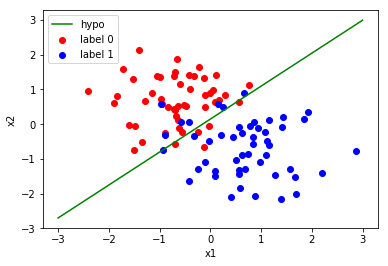

In [13]:


x_axis = np.linspace(-3,3,100)

slope = - theta[1]/theta[2]
intercept = -theta[0]/theta[2]
y_axis = slope*x_axis + intercept

plt.scatter(x0_class0,x1_class0,label="label 0",color='red')
plt.scatter(x0_class1,x1_class1,label="label 1",color='blue')
plt.plot(x_axis, y_axis, '-g', label='hypo')


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()